In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'

In [2]:
data= pd.read_csv("iris.csv")

In [3]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

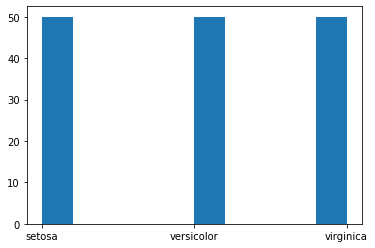

In [5]:
plt.hist(data.Species)

In [6]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
colnames= data.columns.values.tolist()
predictor= colnames[:4]
target= colnames[4]

In [8]:
import numpy as np 

In [9]:
data["is_train"]= np.random.uniform(0,1, len(data))<=0.75

(array([ 30.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 120.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

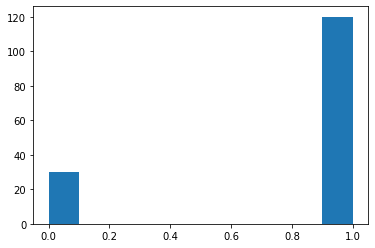

In [10]:
plt.hist(data["is_train"].astype(np.int))

In [11]:
train, test = data[data["is_train"]==True], data[data["is_train"]==False]

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
tree= DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)

In [14]:
tree.fit(train[predictor], train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [15]:
preds = tree.predict(test[predictor])

In [16]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,11,0,0
versicolor,0,12,0
virginica,0,0,7


### Visualizacion de el arbol de decision

In [17]:
from sklearn.tree import export_graphviz

In [18]:
with open ("Hola/iris_dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictor)
    dotfile.close()

FileNotFoundError: [Errno 2] No such file or directory: 'Hola/iris_dtree.dot'

In [19]:
import os
from graphviz import Source

In [20]:
file = open ("Hola/iris_dtree.dot", "r")
text= file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.583\\nsamples = 115\\nvalue = [38, 36, 41]"] ;\n1 [label="entropy = 0.0\\nsamples = 38\\nvalue = [38, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 0.997\\nsamples = 77\\nvalue = [0, 36, 41]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 5.05\\nentropy = 0.398\\nsamples = 38\\nvalue = [0, 35, 3]"] ;\n2 -> 3 ;\n4 [label="Sepal.Length <= 4.95\\nentropy = 0.187\\nsamples = 35\\nvalue = [0, 34, 1]"] ;\n3 -> 4 ;\n5 [label="entropy = 1.0\\nsamples = 2\\nvalue = [0, 1, 1]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 33\\nvalue = [0, 33, 0]"] ;\n4 -> 6 ;\n7 [label="entropy = 0.918\\nsamples = 3\\nvalue = [0, 1, 2]"] ;\n3 -> 7 ;\n8 [label="Petal.Length <= 4.85\\nentropy = 0.172\\nsamples = 39\\nvalue = [0, 1, 38]"] ;\n2 -> 8 ;\n9 [label="entropy = 0.918\\nsamples = 3\\nvalue = [0, 1, 2]"] ;\

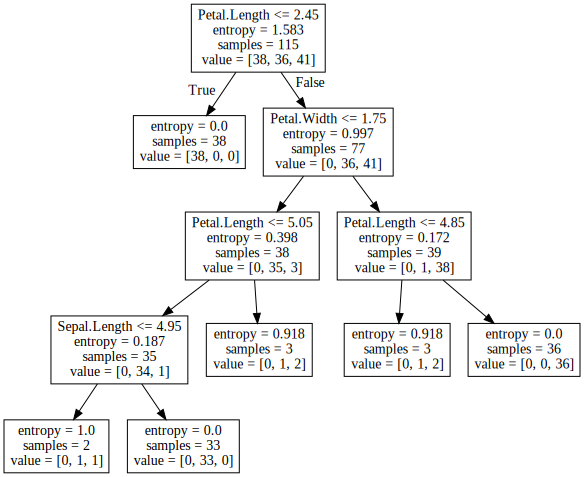

In [21]:
Source(text)

### Cross validation para la poda

In [22]:
x = data[predictor]
y= data[target]

In [23]:
tree= DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [24]:
from sklearn.model_selection import KFold

In [25]:
cv= KFold(n_splits=10, shuffle=True, random_state=1)
cv.get_n_splits(x)

10

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer

In [27]:
scores= cross_val_score(tree, x, y, scoring="accuracy", cv=cv, n_jobs=1)
scores

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [28]:
score= np.mean(scores)

In [29]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(x,y)
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    cv.get_n_splits(x)
    scores = cross_val_score(tree, x, y, scoring="accuracy", cv = cv, n_jobs=-1)
    score = np.mean(scores)
    print("Score para i = ",i," es de ", score)
    print("   ",tree.feature_importances_)

Score para i =  1  es de  0.5666666666666667
    [0. 0. 1. 0.]
Score para i =  2  es de  0.9200000000000002
    [0.         0.         0.66620285 0.33379715]
Score para i =  3  es de  0.9400000000000001
    [0.         0.         0.68976981 0.31023019]
Score para i =  4  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  5  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  6  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  7  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  8  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  9  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  10  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
